In [1]:
# Importing necessary libraries 
import sys
from pathlib import Path
from transformers import CLIPVisionModel, RobertaModel, AutoTokenizer,CLIPConfig
from src import SNAPDemo
import glob

sys.path.append(str(Path('.').absolute().parent))

In [2]:
# download pre-trained models

config = CLIPConfig.from_pretrained("openai/clip-vit-large-patch14")
vision_encoder = CLIPVisionModel.from_pretrained('openai/clip-vit-large-patch14', config=config.vision_config)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.8.self_attn.q_proj.bias', 'text_model.encoder.layers.4.mlp.fc1.bias', 'text_model.encoder.layers.1.mlp.fc1.weight', 'text_model.encoder.layers.6.self_attn.out_proj.bias', 'text_model.encoder.layers.7.self_attn.q_proj.weight', 'text_model.encoder.layers.9.mlp.fc2.bias', 'text_model.encoder.layers.9.mlp.fc1.bias', 'text_model.encoder.layers.4.mlp.fc1.weight', 'text_model.encoder.layers.8.self_attn.out_proj.weight', 'text_model.encoder.layers.10.self_attn.out_proj.bias', 'text_model.encoder.layers.4.self_attn.out_proj.bias', 'text_model.encoder.layers.8.self_attn.out_proj.bias', 'text_model.encoder.layers.6.layer_norm2.bias', 'text_model.encoder.layers.5.self_attn.k_proj.weight', 'text_model.encoder.layers.2.mlp.fc1.weight', 'text_model.encoder.layers.7.layer_norm1.bias', 'text_model.encoder.layers.5.mlp.fc2.weight', 'text_model.encoder.layers.

In [3]:
# Read the Images 
imgDirectory = '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/**/*.jpg'
image_path = glob.glob(imgDirectory, recursive=True)
print(image_path)

['/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/7419c9c6da13534f9e7fdd435125c8fc.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/8dfb4b5e4d375aa4b24473d172ef3f65.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/d28ef77abc4a5d8193969f1ffa99812c.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/5c826f2ea347570d8adf4b467f15aaee.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/196a480dd4705ee8add797b75d34322e.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/4d36c2923427589790e0ed81265c6b8a.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/1298ae45edbe5d62a2203fa27ff99685.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/7f14fba493dc5bf7b8d88ca17f2c4c62.jpg', '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Bag/d8d53dac447f53f5996e790cb6cdf24a.jpg', '/home/tooba/Documents/datasets/snapmode_data

In [5]:
# Create the Visual Search Demo
demo = SNAPDemo(vision_encoder)

In [6]:
# Extract the Features
demo.compute_image_embeddings(image_path)

computing image embeddings: 100%|█████████████| 103/103 [01:04<00:00,  1.61it/s]


/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Shoulderbag/94fd4c3e5f90541892006df927de1fca.jpg


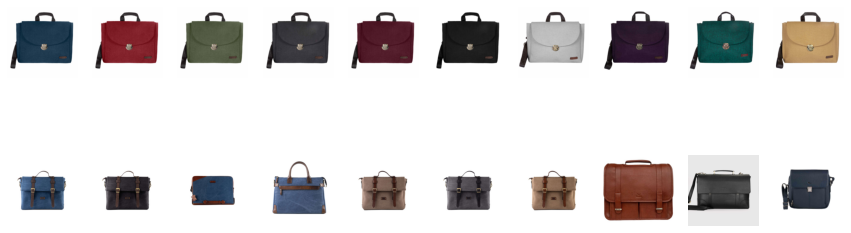

In [10]:
# Run the image search
imgPath = '/home/tooba/Documents/datasets/snapmode_dataset/Img/Women/Bag/Shoulderbag/94fd4c3e5f90541892006df927de1fca.jpg'
demo.image_search(imgPath,20)